In [12]:
import re  # Модуль для работы с регулярными выражениями
import csv  # Модуль для записи в .tsv-файл (табличный текст)
import pandas as pd  # Модуль для работы с таблицами (чтение, анализ, просмотр)

# Функция: Удаляет маркер [123 (1.2)] и оставляет только номер + текст
def strip_marker(line):

    match = re.match(r"^\[\d+\s*\((\d+\.\d+)\)\]\s*(.*)", line)
    if match:
        number, content = match.groups()  # number = '1.2', content = текст
        return f"{number} {content.strip()}"  # возвращаем: "1.2 текст"
    return line.strip()  # если нет маркера — просто убираем пробелы

# Функция: Находит общий префикс (начало), сравнивая строки по словам
def get_common_prefix_by_word(s1, s2):

    words1 = s1.strip().split()  # разбиваем строку на слова
    words2 = s2.strip().split()

    common_words = []  # сюда будем собирать совпавшие слова
    i = 0
    # сравниваем слова по порядку, пока они совпадают
    while i < len(words1) and i < len(words2) and words1[i].lower() == words2[i].lower():
        common_words.append(words1[i])  # добавляем совпавшее слово
        i += 1

    # Склеиваем результат обратно в строки:
    common = ' '.join(common_words)           # общий префикс
    tail1 = ' '.join(words1[i:])              # остаток от первой строки
    tail2 = ' '.join(words2[i:])              # остаток от второй строки
    
    return common, tail1, tail2  # возвращаем три строки

# Чтение двух файлов и запись совпадений в таблицу
with open('MkGl(Li).txt', 'r', encoding='utf-8') as f1, \
     open('MkGl(Ru).txt', 'r', encoding='utf-8') as f2, \
     open('output_table_MARK.tsv', 'w', newline='', encoding='utf-8') as out_file:

    # Создаём "писатель" для записи в файл с табуляцией между столбцами
    writer = csv.writer(out_file, delimiter='\t')

    # Записываем заголовки столбцов в первую строку файла
    writer.writerow(['LI', 'Common Latin', 'RU'])

    # Построчно читаем оба файла одновременно
    for line1, line2 in zip(f1, f2):
        # Удаляем маркеры 
        line1 = strip_marker(line1)
        line2 = strip_marker(line2)

        # Если одна из строк пустая, пропускаем
        if not line1 or not line2:
            continue

        # Находим общий префикс по словам и остатки строк
        common, tail1, tail2 = get_common_prefix_by_word(line1, line2)

        # Записываем результат в таблицу, если общий фрагмент содержит хотя бы 3 слова
        if common.strip() and len(common.strip().split()) > 2:
            writer.writerow([tail1.strip(), common.strip(), tail2.strip()])

# Читаем готовый .tsv-файл как таблицу и выводим её в ноутбуке (для проверки) 
df = pd.read_csv('output_table.tsv', delimiter='\t')
df


,LI,Common Latin,RU
0,hua hæfeð earo hernisses geherað.,4.23 siquis habet aures audiendi audiat gif,hwelc hæfeð eara hernisse giheras.
1,remetietur uobis et adicietur uobis & cuoeð he...,4.24 Et dicebat illis uidete quid audiatis in ...,remitietur uobis et adicietur uos & cwæð to hi...
2,hæfed gesald bið him & seðe næfeð uutedlice þæ...,4.25 Qui enim habet dabitur illi et qui non ha...,hæfeð gisald bið him & seðe ne hæfeð wutudlice...
3,quemammodum si homo iaceat sementem in terram ...,4.26 Et dicebat sic est regnum dei,Quemadmodum si homo iactet sementem in terram ...
4,ł slepeð & arisað on næht & on daeg & sed wæxa...,4.27 et dormiat et exsurgat nocte ac die et se...,& arisas on næht & on dæge & sed weceð ł wyrtr...
...,...,...,...
409,monigo forðon gecyðnise leas hia gecuoedon wið...,14.56 multi enim testimonium falsum dicebant a...,monige forðon cyðnisse leose hię gicwedun to s...
410,summ monn aras leas gecyðnise sægdon wið him c...,14.57 Et quidam surgentes falsum testimonium f...,sum mon arisende leose gicyðnisse sægdun wið h...
411,aliud non manu factum aedificabo forðon ue geh...,14.58 quoniam nos audiuimus eum dicentem ego d...,aliut non manu factum aedificabo forðon we gih...
412,gecyðnise hiora ł ðara.,14.59 et non erat conueniens testimonium illor...,gicyðnisse hiora.


In [30]:
# Чтение таблицы TSV
df = pd.read_csv('/Users/ann/gospels/output_table_MARK.tsv', delimiter='\t')

''' Извлекаем три столбца из таблицы в виде списков'''

li_column = df['LI'].tolist()  
common_latin_column = df['Common Latin'].tolist()  
ru_column = df['RU'].tolist()  

''' Записываем каждый из этих списков в отдельный текстовый файл'''

with open('li_column.txt', 'w', encoding='utf-8') as file_li:
    file_li.write('\n'.join(li_column))  

with open('common_latin_column.txt', 'w', encoding='utf-8') as file_common:
    file_common.write('\n'.join(common_latin_column))  

with open('ru_column.txt', 'w', encoding='utf-8') as file_ru:
    file_ru.write('\n'.join(ru_column)) 

''' Открываем нужные нам файл с переводами'''
with open('li_column.txt', 'r', encoding='utf-8') as file:
    text1 = file.read()
with open('ru_column.txt', 'r', encoding='utf-8') as file:
    text2 = file.read()

In [15]:
''' Токенизируем'''
def tokenize(text):
    tokens = re.findall(r'\b[\wþðæǣȝ]+\b', text.lower())  
    return tokens
nice_text1 = tokenize(text1)
nice_text2 = tokenize(text2)
''' Проверяем'''
print(nice_text1[: 100])
print(nice_text2[: 100])

['hua', 'hæfeð', 'earo', 'hernisses', 'geherað', 'remetietur', 'uobis', 'et', 'adicietur', 'uobis', 'cuoeð', 'he', 'to', 'him', 'geseað', 'huæt', 'gie', 'heras', 'on', 'sua', 'huælc', 'gewęge', 'gewoegen', 'gie', 'biðon', 'eft', 'gewoegen', 'bið', 'iowh', 'gesald', 'bið', 'ł', 'geeced', 'bið', 'iowh', 'hæfed', 'gesald', 'bið', 'him', 'seðe', 'næfeð', 'uutedlice', 'þætte', 'hæfeð', 'genumen', 'bið', 'from', 'him', 'quemammodum', 'si', 'homo', 'iaceat', 'sementem', 'in', 'terram', 'he', 'cuoeð', 'ðus', 'is', 'ric', 'godes', 'huu', 'suæ', 'gif', 'monn', 'worpað', 'ðone', 'sawende', 'ł', 'sedere', 'on', 'eorðo', 'ł', 'slepeð', 'arisað', 'on', 'næht', 'on', 'daeg', 'sed', 'wæxað', 'ł', 'wyrtrumiað', 'inwæxað', 'ða', 'huile', 'ne', 'wat', 'ðe', 'spinam', 'deinde', 'plenum', 'frumentum', 'in', 'spica', 'lustum', 'forðon', 'eorðo', 'wæstmiað', 'ærist']
['hwelc', 'hæfeð', 'eara', 'hernisse', 'giheras', 'remitietur', 'uobis', 'et', 'adicietur', 'uos', 'cwæð', 'to', 'him', 'giseað', 'hwæt', 'ge',

In [16]:
''' Создаем сами список стоп слов для староанглийского'''

old_english_stopwords = {'andon', 'þonne', 'wið', 'to', 'þæt','þe', 
'ne', 'ic', 'me', 'heo', 'him', 'he', 'swa', 'þis', 'mid', 'þu', 'ofer', 
'his', 'þriwa', 'seo', 'hit', 'se', 'þas', 'cweð', 'þæs', 'in', 'sy', 'ða', 
'ðy', 'ær', 'ðonne', 'næfre', 'þone', 'ge', 'ðas', 'þære', 'þam', 'is', 'of', 
'gif', 'þæm', 'nu', 'under', 'wiþ', 'geond', 'æfter', 'ðis', 'do', 'hwæt', 'her', 
'þurh', 'þus', 'lytel', 'æt', 'ðin', 'willian', 'cume', 'þeos', 'þara', 'are', 'cuman', 
'com', 'ænig', 'þon', 'for', 'us', 'ac', 'bot', 'ende', 'wæs', 'wǣre', 'wes', 'wǣron', 
'wǣren', 'wesað', 'ic', 'wit', 'wē', 'mīn', 'uncer', 'ūser', 'ūre', 'mē', 'unc', 'ūs', 'mec', 
'uncit', 'ūsic', 'ðū', 'git', 'gē', 'ðīn', 'incer', 'ēower', 'ēowre', 'ðē', 'inc', 'ēow', 
'ðec', 'incit', 'ēowic', 'hē', 'hēo', 'hīe', 'hit', 'hyt', 'hī', 'hȳ', 'hire', 'hira', 
'heora', 'hiera', 'heom', 'hine', 'nǣr', 'nǣfre', 'nǣnig', 'nolde', 'noldon', 'be', 
'beforan', 'betweox', 'for', 'from', 'fram', 'mid', 'tō', 'geond', 'oð', 'þurh', 
'ofer', 'under', 'bēo', 'bist', 'biþ', 'bēoþ', 'bēon', 'ēom', 'sīe', 'eart', 
'sī', 'is', 'sēo', 'sindon', 'sint', 'nēom', 'neart', 'nis', 'sīo', 'ðæt', 
'tæt', 'ðæs', 'ðǣre', 'ðǣm', 'ðām', 'ðone', 'ðā', 'ðȳ', 'ðē', 'ðon', 'ðāra', 
'ðǣra', 'ðes', 'ðēos', 'ðisse', 'ðeosse', 'ðises', 'ðisses', 'ðisum', 'ðissum', 
'ðisne', 'ðās', 'ðīs', 'ðȳs', 'ðissa', 'ðeossa', 'ðeosum', 'ðeossum', 'twēgen', 
'twā', 'tū', 'twēgra', 'twǣm', 'þrīe', 'þrēo', 'þrēora', 'þrīm', 'endlefan', 'twelf', 
'twēntig', 'þrēotīene', 'þrītig', 'fēower', 'fēowertīene', 'fēowertig', 'fīf', 'fīftīene', 
'fīftig', 'siex', 'siextīene', 'siextig', 'seofon', 'seofontīene', 'seofontig', 'eahta', 
'eahtatīene', 'eahtatig', 'nigon', 'nigontīene', 'nigontig', 'tīen', 'hund', 'gā', 'gǣst', 
'ł', 'eum', 'on', 'est', 'þætte', 'ðæm', 'hia', 'non', 'cum', 'mið', 'miððy', 'autem', 'qui', 
'de', 'illi', 'ðu', 'seðe', 'eius', 'eis', 'ad', 'forðon', 'ait', 'bið', 'ei', 'enim', 'hælend', 'quia',
'gie', 'illis', 'ðe', 'ut', 'et', 'sua', 'alle', 'ah', 'a', 
}

In [17]:
''' Находим самые частые слова'''

from collections import Counter

# Очищаем от стоп-слов
text1_clean = [word for word in nice_text1 if word not in old_english_stopwords]
text2_clean = [word for word in nice_text2 if word not in old_english_stopwords]

# Считаем частоты
word_freqs1 = Counter(text1_clean).most_common(30)
word_freqs2 = Counter(text2_clean).most_common(30)

# Табличка
for (w1, f1), (w2, f2) in zip(word_freqs1, word_freqs2):
    print(f"{w1:15} {f1:<5} | {w2:15} {f2}")


cuoeð           94    | cwæð            111
uutedlice       54    | wutudlice       50
iuh             40    | iow             48
god             26    | hię             48
sie             24    | werun           28
la              24    | we              24
biðon           22    | sunu            23
sunu            22    | god             23
ðaðe            22    | were            23
monn            21    | cweðende        23
cuoeðende       21    | hiæ             22
ðegnas          20    | cwedun          22
an              20    | mæhte           22
we              19    | ðætte           21
hus             19    | ðegnas          21
soðlice         19    | ðaðe            20
huæt            18    | sie             19
sed             18    | monige          19
were            18    | soðlice         19
cuoedon         18    | soð             19
woeron          18    | sed             18
fore            18    | la              18
hua             17    | hwelc           17
huu       

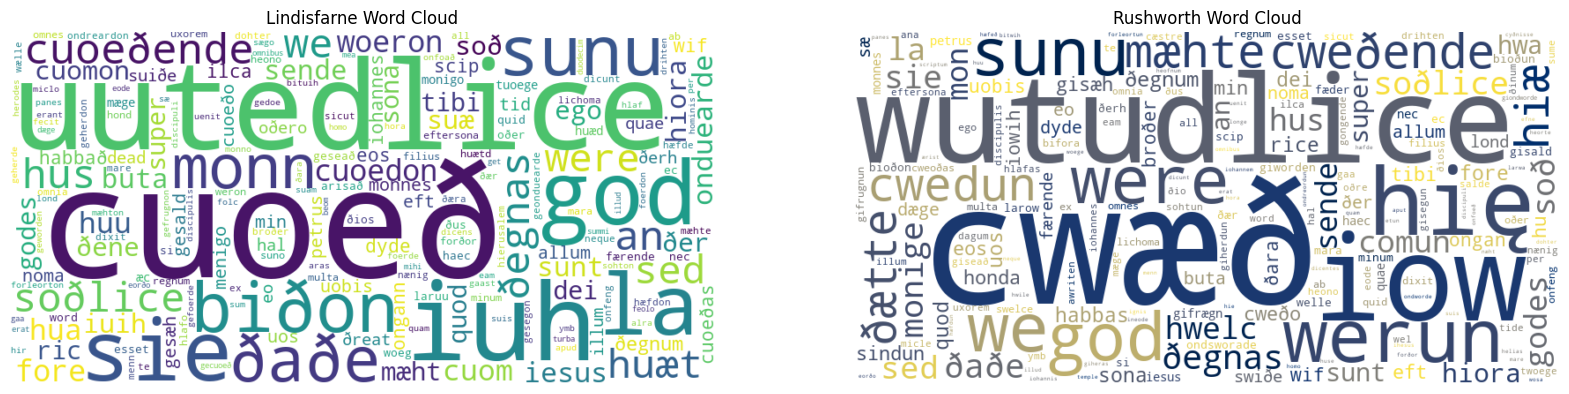

In [18]:
''' Визуализируем'''

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_freqs1 = Counter(text1_clean)
word_freqs2 = Counter(text2_clean)

# Создаем wordcloud
wc1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqs1)
wc2 = WordCloud(width=800, height=400, background_color='white', colormap='cividis').generate_from_frequencies(word_freqs2)

# Отображаем оба облака слов
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(wc1, interpolation='bilinear')
axs[0].set_title("Lindisfarne Word Cloud")
axs[0].axis('off')

axs[1].imshow(wc2, interpolation='bilinear')
axs[1].set_title("Rushworth Word Cloud")
axs[1].axis('off')

plt.show()

In [19]:
''' Создаём модель мешка слов'''

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

texts = [text1, text2]

X = vectorizer.fit_transform(texts) #fit transform cоздает модель мешка слов
len(vectorizer.get_feature_names_out()) #количество уникальных лемм в нашей модели

text_vector = pd.DataFrame(columns = vectorizer.get_feature_names_out(), data = X.toarray()) 
text_vector

,ab,abhominationen,abidas,abierunt,abiit,abit,abominationem,abracham,abraham,abrahames,...,þæt,þæte,þætte,ęarliprica,ęc,ędificauit,ęghuelc,ęhher,ęngum,ęteoweð
0,0.012259,0.000000,0.002154,0.001532,0.003065,0.000000,0.002154,0.000000,0.002154,0.001532,...,0.144038,0.000000,0.140973,0.000000,0.004597,0.002154,0.002154,0.000000,0.000000,0.000000
1,0.012379,0.002175,0.000000,0.001547,0.001547,0.002175,0.000000,0.002175,0.000000,0.001547,...,0.051064,0.002175,0.088201,0.002175,0.003095,0.000000,0.000000,0.002175,0.002175,0.002175


<Axes: >

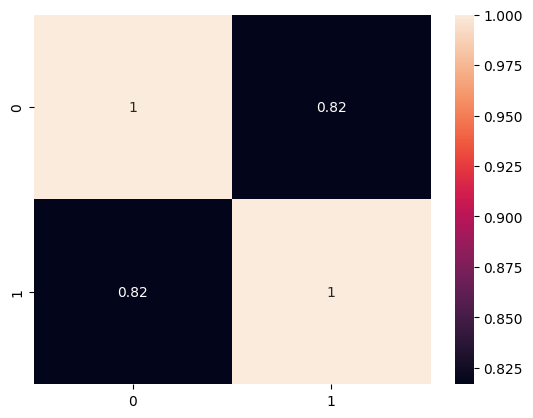

In [20]:
''' Вычисление косинусного сходства между двумя векторами'''
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

vector_1 = [X.toarray()[0]]
vector_2 = [X.toarray()[1]]
cosine_similarity(vector_1, vector_2)

# Вычисляем матрицу сходств
matrix = cosine_similarity(X.toarray())

# Визуализация
sns.heatmap(matrix, annot=True)

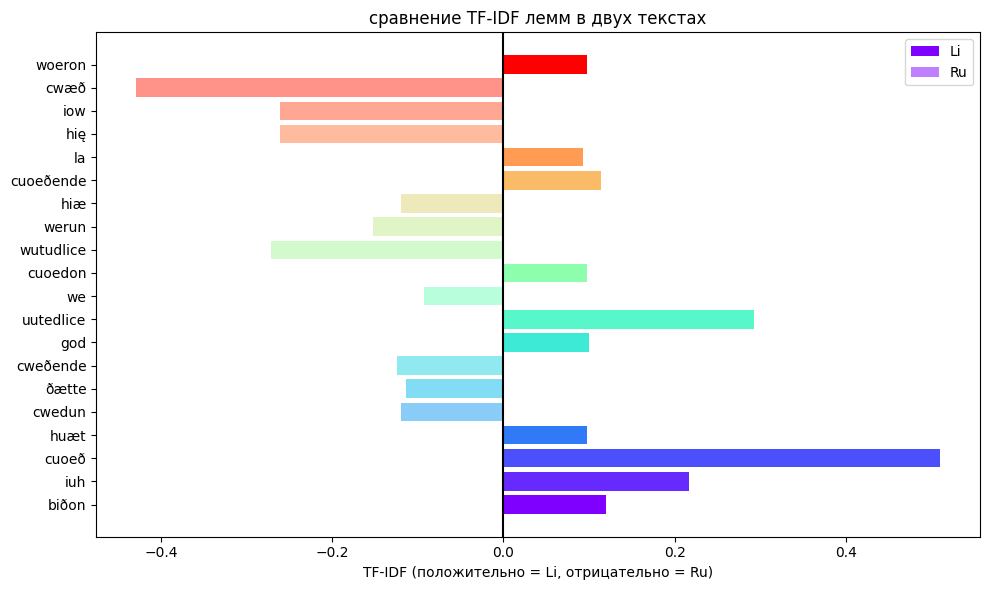

In [38]:
''' Леммы с наибольшим весом по метрике TF-IDF ''' 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

text1_clean_str = ' '.join(text1_clean)
text2_clean_str = ' '.join(text2_clean)

# Создаем объект TfidfVectorizer
vectorizer = TfidfVectorizer()

# Применяем векторизацию к очищенным текстам
tfidf_matrix = vectorizer.fit_transform([text1_clean_str, text2_clean_str])

# Преобразуем результат в DataFrame для удобства работы
text_vector = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Получаем список лемм (терминов)
lemmas = list(text_vector.columns)

# Векторы TF-IDF по строкам (0 и 1, если всего два текста)
tf_idf_0 = text_vector.loc[0].tolist()
tf_idf_1 = text_vector.loc[1].tolist()

# Объединяем леммы с их значениями
lemmas_tf_idf_0 = list(zip(lemmas, tf_idf_0))
lemmas_tf_idf_1 = list(zip(lemmas, tf_idf_1))

# Сортируем по значимости (TF-IDF) по убыванию
sorted_lemmas_0 = sorted(lemmas_tf_idf_0, key=lambda x: x[1], reverse=True)
sorted_lemmas_1 = sorted(lemmas_tf_idf_1, key=lambda x: x[1], reverse=True)

# Берём топ-10 лемм
top1 = dict(sorted_lemmas_0[:10])
top2 = dict(sorted_lemmas_1[:10])

# Для выравнивания: делаем объединённый список лемм
all_lemmas = list({*top1.keys(), *top2.keys()})
top1_full = {lemma: top1.get(lemma, 0) for lemma in all_lemmas}
top2_full = {lemma: top2.get(lemma, 0) for lemma in all_lemmas}

# Радужные цвета
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(all_lemmas)))

# Строим график
plt.figure(figsize=(10, 6))

# Первый текст (Li)
for i, (lemma, value) in enumerate(top1_full.items()):
    plt.barh(lemma, value, color=rainbow_colors[i], label='Li' if i == 0 else "")

# Второй текст (Ru) — отрицательные значения
for i, (lemma, value) in enumerate(top2_full.items()):
    plt.barh(lemma, -value, color=rainbow_colors[i], alpha=0.5, label='Ru' if i == 0 else "")

# Оформление
plt.axvline(0, color='black')  # нулевая линия
plt.xlabel('TF-IDF (положительно = Li, отрицательно = Ru)')
plt.title('cравнение TF-IDF лемм в двух текстах')
plt.legend()
plt.tight_layout()
plt.show()

